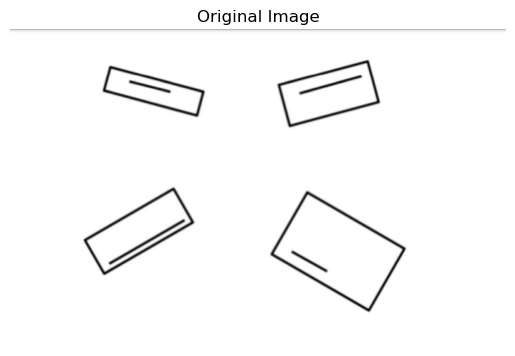

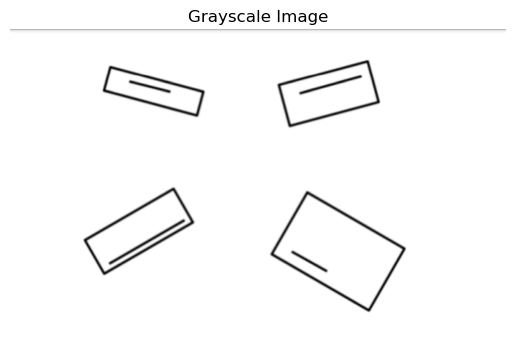

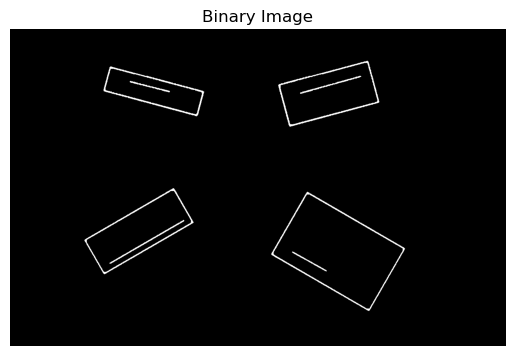

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image to work with 
image_path = "image_with_rectangles.jpg"
# Read the image
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# Convert the loaded image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

# Apply thresholding to graysscle to create a binary image
# Pixels above 200 become white (255), others become black (0)
_, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY_INV)

# Define a kernel for erosions
kernel = np.ones((5, 5), np.uint8)

# Using cv2.erode() method 
# erosion removes pixels on object boundaries
binary_image = cv2.erode(binary_image, kernel) 
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()

# Find contours in the binary image
# Contours are simply the boundaries of white regions in the image
# RETR_TREE retrieves all contours and reconstructs a full hierarchy of nested contours
# CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points
[contours,hierarchy] = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a dictionary and arrays to store line lengths and rectangles
line_lengths = {}
rectangles = []
# print(len(contours))
# print(hierarchy)

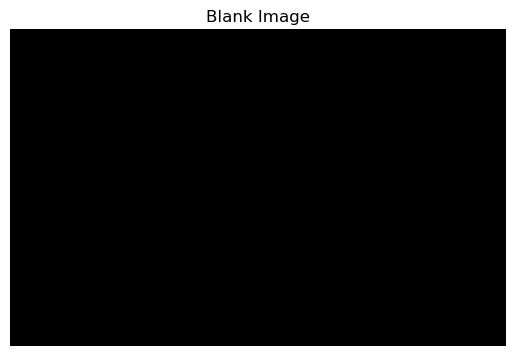

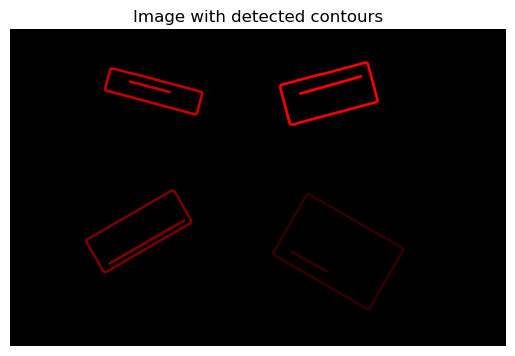

In [2]:
# Create a blank image to draw and visualize the contours and rectangles
blank_image = np.zeros((image.shape[0], image.shape[1],3), np.uint8)
plt.imshow(blank_image)
plt.title("Blank Image")
plt.axis('off')
plt.show()

# Loop through each contour (rectangle) detected in the image
for i in range(len(contours)):
    contour = contours[i]
    # Approximate the contour with a polygon to simplify its shape
    # This is done to estimate the number of sides of the rectangle
    approx = cv2.approxPolyDP(contour, 0.05 * cv2.arcLength(contour, True), True)
    
    # Check if the polygon has 2 vertices (a straight line)   
    if (len(approx) == 2):
        # Draw the detected line on the blank image for visualization
        cv2.drawContours(blank_image, [approx], 0, (i * 25, 0, 0), 5)
        # Calculate the line length as the contour's arc length (perimeter)
        line_lengths[i] = cv2.arcLength(contour, True)
        # Get the parent index of the current contour in the hierarchy
        parent = hierarchy[0][i][3]
        # Draw the parent contour on the blank image for visualization
        cv2.drawContours(blank_image, [contours[parent]], 0, (i * 25, 0, 0), 5)
plt.imshow(blank_image)
plt.title("Image with detected contours")
plt.axis('off')
plt.show()

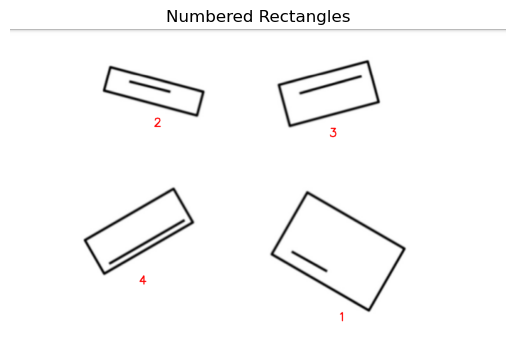

In [3]:
# Sort the dictionary by line lengths in ascending order
sorted_length = sorted(line_lengths.items(), key=lambda x:x[1])

# Create a copy of the original image to draw numbered rectangles on
numbered_image = image.copy()

# Loop through the sorted contours to draw rectangles with numbers
for i in range(len(sorted_length)):
    # Get the index of the line (rectangle)
    line_index = sorted_length[i][0]
    # Get the parent index of the line
    parent_index = hierarchy[0][line_index][3]
    # Get the contours of the parent rectangle
    parent = contours[parent_index]
    # Get the bounding rectangle around the parent contour
    x, y, w, h = cv2.boundingRect(parent)
    # put a text label with the rectangle at the center of the rectangle
    text_x = x + w // 2  # X-coordinate for the text
    text_y = y + h + 30  # Y-coordinate for the text (adjust 30 to control the distance)   
    cv2.putText(numbered_image, str(i + 1), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
# show the final image with numbered rectangles
plt.title("Numbered Rectangles")
plt.imshow(cv2.cvtColor(numbered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()